In [10]:
import numpy as np

# lets create random clusters of data around 5 centers
vectors = []
cluster_centers = np.array([
    [1.0, 0.0],
    [0.0, 1.0],
    [1.0, 1.0],
    [-1.5, 1.5],
    [1.5, 2.5]
])
# ensure the random vectors are centered around the clusters
# and are generated with a static seed
# also ensure that they are spread out, almost touching and possibly some
num_vectors = 512 * 3 * 8
np.random.seed(0)
for i in range(num_vectors):
    cluster = cluster_centers[np.random.choice([0, 1, 2, 3, 4])]
    angle = np.random.uniform(0, 1.5 * np.pi)
    length = np.random.uniform(-1.25, 1.25)
    vector = cluster + length * np.array([np.cos(angle), np.sin(angle)])
    vectors.append(vector)

# cluster the data and adjust the centers based on their actually nearest vectors
vector_labels = []
# Do kmeans clustering of all the vectors
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=(num_vectors//512), random_state=0).fit(vectors)
vector_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

Text(0.5, 1.0, 'Random Clusters of Data')

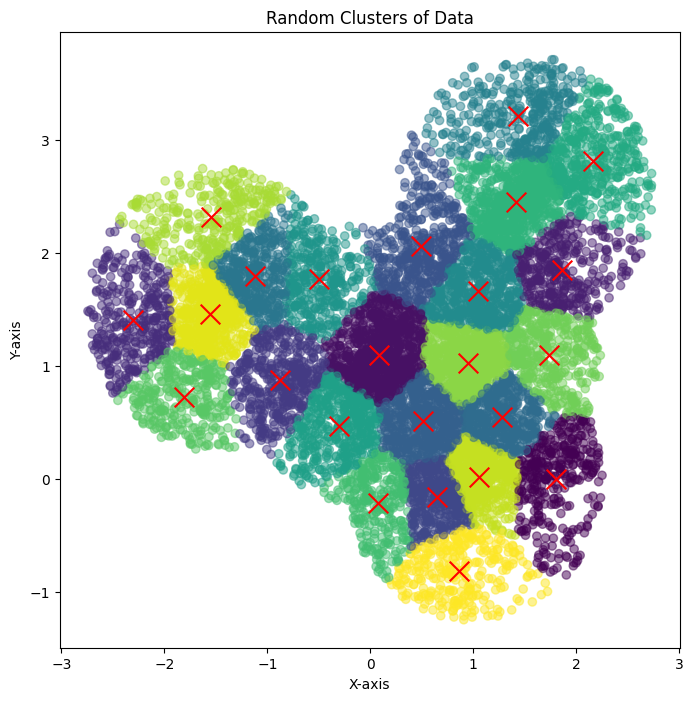

In [ ]:
# scatter plot the vectors colored by their cluster
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(*zip(*vectors), c=vector_labels, cmap='viridis', alpha=0.5)
plt.scatter(*zip(*cluster_centers), c='red', marker='x', s=200)
plt.title('Random Clusters of Data')

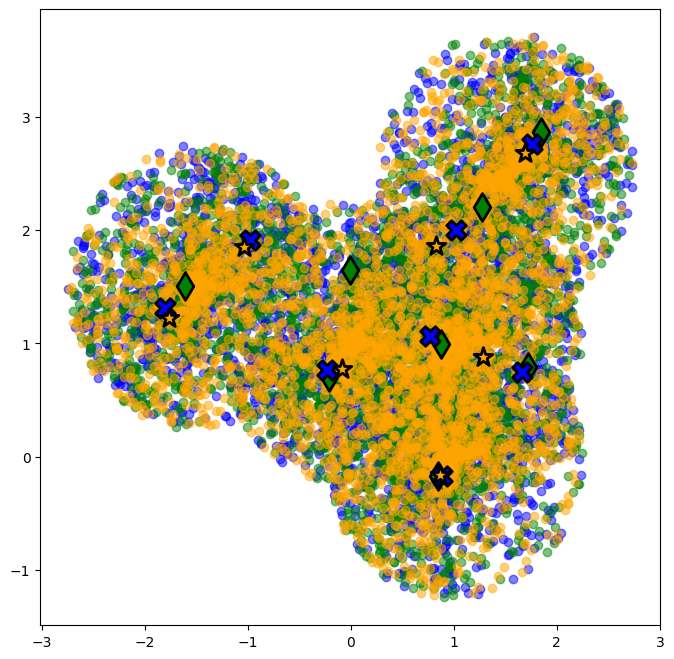

In [12]:
# randomly select 1/3 of the vectors, without replacement into three separate sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(vectors, test_size=0.33, random_state=42)
train_set, val_set = train_test_split(train_set, test_size=0.5, random_state=42)
# plot the three sets of vectors

import math

# kmeans clustering of the three sets, assuming 512 vectors in each set
kmeans_train = KMeans(n_clusters=(len(train_set)//512), random_state=0).fit(train_set)
kmeans_val = KMeans(n_clusters=(len(val_set)//512), random_state=0).fit(val_set)
kmeans_test = KMeans(n_clusters=(len(test_set)//512), random_state=0).fit(test_set)
# plot the three sets of vectors with their cluster centers

plt.figure(figsize=(8, 8))
plt.scatter(*zip(*train_set), c='blue', alpha=0.5, label='Sample 1')
plt.scatter(*zip(*val_set), c='green', alpha=0.5, label='Sample 2')
plt.scatter(*zip(*test_set), c='orange', alpha=0.5, label='Sample 3')
plt.scatter(*zip(*kmeans_val.cluster_centers_), c='green', marker='d', linewidths=2, s=200, edgecolors='black')
plt.scatter(*zip(*kmeans_train.cluster_centers_), c='blue', marker='X', linewidths=2, s=200, edgecolors='black')
plt.scatter(*zip(*kmeans_test.cluster_centers_), c='orange', marker='*', linewidths=2, s=200, edgecolors='black')

Text(0.5, 1.0, 'Random Clusters of Data with Cluster Centers')

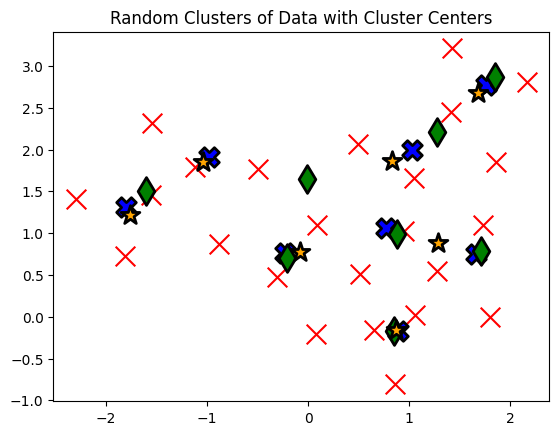

In [13]:
# graph original centers with sampled centers, original are red
plt.scatter(*zip(*cluster_centers), c='red', marker='x', s=200)
plt.scatter(*zip(*kmeans_train.cluster_centers_), c='blue', marker='X', linewidths=2, s=200, edgecolors='black')
plt.scatter(*zip(*kmeans_val.cluster_centers_), c='green', marker='d', linewidths=2, s=200, edgecolors='black')
plt.scatter(*zip(*kmeans_test.cluster_centers_), c='orange', marker='*', linewidths=2, s=200, edgecolors='black')
plt.title('Random Clusters of Data with Cluster Centers')


/var/folders/vg/q43_zcls7_52j34ct3l3tyn80000gn/T/ipykernel_81186/2074867325.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*zip(*cluster_centers), c='red', marker='x', s=200, linewidths=2, edgecolors='black')


Text(0.5, 1.0, 'Random Clusters of Data with Nearest Global Cluster Centers')

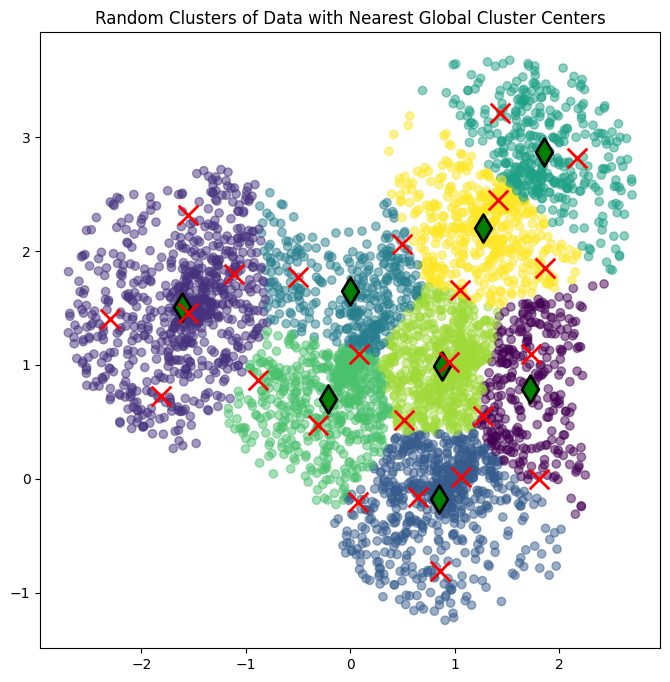

In [35]:
# visualize the sampled clusters with their nearest global cluster centers
# first calculate the 3 nearest global cluster center for each sampled cluster center
train_nearest_globals = []
for center in kmeans_train.cluster_centers_:
    distances = np.linalg.norm(cluster_centers - center, axis=1)
    nearest_indices = np.argsort(distances)[:3]
    train_nearest_globals.append(cluster_centers[nearest_indices])
test_nearest_globals = []
for center in kmeans_test.cluster_centers_:
    distances = np.linalg.norm(cluster_centers - center, axis=1)
    nearest_indices = np.argsort(distances)[:3]
    test_nearest_globals.append(cluster_centers[nearest_indices])
val_nearest_globals = []
for center in kmeans_val.cluster_centers_:
    distances = np.linalg.norm(cluster_centers - center, axis=1)
    nearest_indices = np.argsort(distances)[:3]
    val_nearest_globals.append(cluster_centers[nearest_indices])

# plot the three sets of nearest globals 
plt.figure(figsize=(8, 8))
flattened_val_nearest_globals = [point for cluster in val_nearest_globals for point in cluster]
flattened_train_nearest_globals = [point for cluster in train_nearest_globals for point in cluster]
flattened_test_nearest_globals = [point for cluster in test_nearest_globals for point in cluster]
# create an animation where it starts off with red xs for all global centers
# then transitions to val green diamonds with green nearest globals
# then transitions to blue Xs with blue nearest globals
# then transitions to orange stars with orange nearest globals
#plt.scatter(*zip(*flattened_val_nearest_globals), c='green', marker='d', linewidths=2, s=200, edgecolors='black')
plt.scatter(*zip(*val_set), c=kmeans_val.labels_, cmap='viridis', alpha=0.5)
plt.scatter(*zip(*kmeans_val.cluster_centers_), c='green', marker='d', linewidths=2, s=200, edgecolors='black')
# plot true global centers
plt.scatter(*zip(*cluster_centers), c='red', marker='x', s=200, linewidths=2, edgecolors='black')
plt.title('Random Clusters of Data with Nearest Global Cluster Centers')


In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Prepare to store frames for the animation
fig, ax = plt.subplots(figsize=(6, 6))
ims = []

# Custom implementation to simulate KMeans step by step
k = 4
rng = np.random.RandomState(42)
centroids = X[rng.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    return np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

def compute_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# Simulate iterations
for _ in range(10):
    labels = assign_clusters(X, centroids)
    new_centroids = compute_centroids(X, labels, k)

    # Plot the current state
    im = ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
    cent_im = ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', edgecolor='k')
    ims.append([im, cent_im])

    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Create the animation
ani = animation.ArtistAnimation(fig, ims, interval=700, blit=True)
plt.close(fig)  # Prevent static display

ani
# Save the animation as a GIF
ani.save('kmeans_animation.gif', writer='imagemagick', fps=2)


MovieWriter imagemagick unavailable; using Pillow instead.


[array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1

/var/folders/vg/q43_zcls7_52j34ct3l3tyn80000gn/T/ipykernel_55817/217569653.py:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(data[:, 0], data[:, 1], s=30, cmap='tab20')


'data/hierarchical_kmeans_precise.gif'

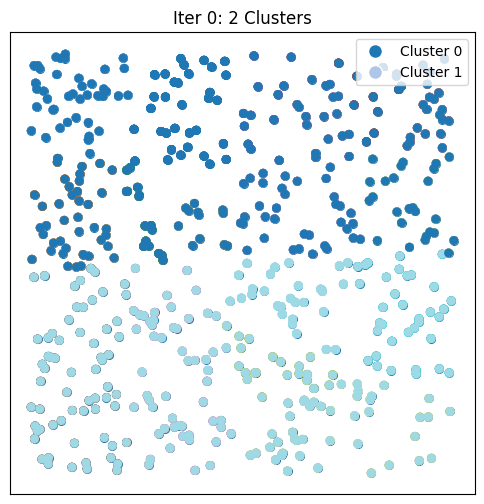

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation, PillowWriter

# Redefine the hierarchical_kmeans function to support hierarchical splitting from 4 -> 8 -> 16 clusters
def hierarchical_kmeans_precise(data, initial_k, levels):
    from collections import deque

    all_labels = []
    cluster_queue = deque()
    cluster_queue.append((data, np.arange(len(data))))

    # Step 1: initial k-means to get 'initial_k' clusters
    kmeans = KMeans(n_clusters=initial_k, random_state=42).fit(data)
    labels = kmeans.labels_
    clusters = [np.where(labels == i)[0] for i in range(initial_k)]
    all_labels.append(labels.copy())

    # Add initial clusters to the queue
    for indices in clusters:
        cluster_queue.append((data[indices], indices))

    current_level = 1
    total_levels = levels

    while current_level <= total_levels:
        next_labels = np.zeros(len(data), dtype=int)
        next_queue = deque()
        cluster_id = 0

        while cluster_queue:
            cluster_data, global_indices = cluster_queue.popleft()
            if len(cluster_data) < 2:
                next_labels[global_indices] = cluster_id
                cluster_id += 1
                continue

            kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_data)
            for sub_cluster in range(2):
                sub_indices = np.where(kmeans.labels_ == sub_cluster)[0]
                actual_indices = global_indices[sub_indices]
                next_labels[actual_indices] = cluster_id
                next_queue.append((cluster_data[sub_indices], actual_indices))
                cluster_id += 1

        all_labels.append(next_labels.copy())
        cluster_queue = next_queue
        current_level += 1

    return all_labels
# Generate random 2D data
np.random.seed(42)
data = np.random.rand(512, 2)

# Run hierarchical k-means: first to 4, then to 8, then 16
labels_all_levels = hierarchical_kmeans_precise(data, initial_k=2, levels=4)  # 4 -> 8 -> 16
print(labels_all_levels)

# Create updated animation
fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter(data[:, 0], data[:, 1], s=30, cmap='tab20')
ax.set_title("Hierarchical K-Means Clustering")
ax.set_xticks([])
ax.set_yticks([])

def update_precise(frame):
    sc = ax.scatter(data[:, 0], data[:, 1], c=labels_all_levels[frame], s=30, cmap='tab20')
    ax.set_title(f"Iter {frame}: {np.unique(labels_all_levels[frame]).size} Clusters")
    # add legend with color map
    handles = []
    # only show the first n clusters in the legend
    for i in range(min(8, np.unique(labels_all_levels[frame]).size)):
        handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', markersize=10, markerfacecolor=sc.cmap(i)))
    ax.legend(handles=handles, loc='upper right')
    return sc,

ani_precise = FuncAnimation(fig, update_precise, frames=len(labels_all_levels), interval=1500, repeat_delay=2000)
gif_path_precise = "data/hierarchical_kmeans_precise.gif"
ani_precise.save(gif_path_precise, writer=PillowWriter(fps=0.5))

gif_path_precise
